In [2]:
import matplotlib.pyplot as plt
import pandas as pd

,Method,ThreadsNumber,Duration(s),ArraySize,TotalSum
0,no_threads,1,1.069000,100000000.0,10366148.0
1,threads_v1,1,0.516333,100000000.0,10366148.0
2,threads_v1,2,0.305000,100000000.0,10366148.0
3,threads_v1,4,0.201000,100000000.0,10366148.0
4,threads_v1,8,0.155333,100000000.0,10366148.0
5,threads_v1,16,0.140333,100000000.0,10366148.0
6,threads_v1,32,0.124667,100000000.0,10366148.0
7,threads_v1,64,0.128333,100000000.0,10366148.0
8,threads_v1,128,0.128333,100000000.0,10366148.0
9,threads_v1,256,0.125667,100000000.0,10366148.0


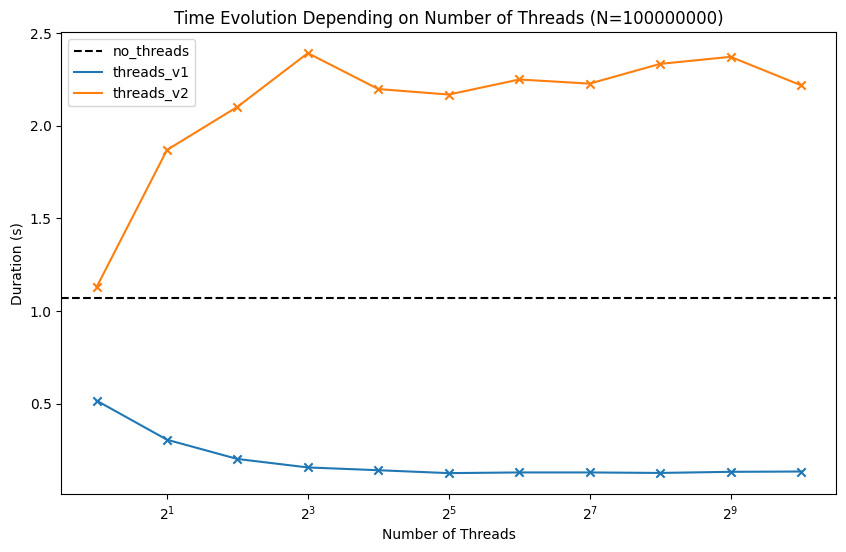

In [3]:
# Read the data from the file
data = pd.read_csv("thread-results-v1.csv")

# Select only data with 100 million array size
N = 100000000
data_filtered = data.query("`ArraySize` == @N")

# Group the data by Method and ThreadsNumber, and calculate the mean Duration
grouped_data = data_filtered.groupby(['Method', 'ThreadsNumber']).mean().reset_index()
display(grouped_data)

no_threads_mean_duration = grouped_data.query("`Method` == 'no_threads'")["Duration(s)"].item()

all_other_methods = []
for method in grouped_data["Method"].unique():
    if method != "no_threads":
        all_other_methods.append(method)

data_other_methods = {}
for method in all_other_methods:
    data_other_method = grouped_data.query("`Method` == @method").sort_values("ThreadsNumber")
    data_other_methods[method] = data_other_method[["ThreadsNumber", "Duration(s)"]].values

# Plotting
plt.figure(figsize=(10, 6))

xlabels = sorted(grouped_data["ThreadsNumber"].unique())
plt.axhline(y=no_threads_mean_duration, color='black', linestyle='--', label='no_threads')
for method in all_other_methods:
    plt.plot(data_other_methods[method][:,0], data_other_methods[method][:,1], label=method)
    plt.scatter(data_other_methods[method][:,0], data_other_methods[method][:,1], marker="x")

# Adding labels and legend
plt.xlabel('Number of Threads')
plt.ylabel('Duration (s)')
plt.title(f'Time Evolution Depending on Number of Threads (N={N})')
plt.legend()
plt.gca().set_xscale('log', base=2)

# Show plot
plt.show()
